<a href="https://colab.research.google.com/github/codewithhari98/Machine_Learning/blob/main/Linear%20Discriminant%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

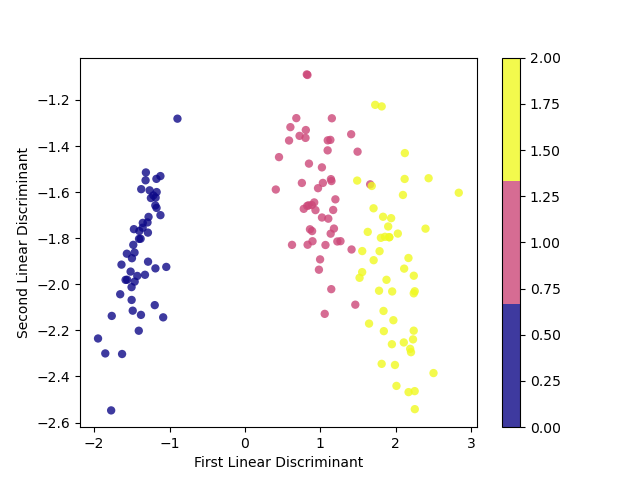

In [ ]:

#This Program is for Linear Driscriminant Analaysis from scratch on Iris Dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

%matplotlib widget
iris = load_iris()

class Linear_Discriminant_Analysis():
    def __init__(self, ylength):
        self.no_of_columns = ylength
        self.linear_discriminants = None
    def fit(self,x,y):
        m,n = x.shape
        #we use np.unique to find unique elements of an array
        class_labels = np.unique(y)
        
        #axis = 0 means along the column
        totalmean = np.mean(x, axis=0) 
        w = np.zeros((4, 4))
        b = np.zeros((4, 4))
        
        #Count number of occurrences of each value in array of non-negative ints
        no_of_ocurences=np.bincount(y)
    
        for c in class_labels:
            w += np.cov(x[y==c].T)
            meanvector=[]
            [meanvector.append(np.mean(x[y==c],axis=0)) for i in range(3)]
            b += no_of_ocurences[c]*(((meanvector[c]-totalmean).reshape(4,1)).dot(((meanvector[c]-totalmean).reshape(1,4))))
            
        A = np.linalg.inv(w).dot(b)
        
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        
        # we want to sort eigenvalues high to low for our calculations
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        # store only the first n eigenvectors
        self.linear_discriminants = eigenvectors[0 : self.no_of_columns]
        
    def predict(self, X):
        return np.dot(X, self.linear_discriminants.T)
        #project the data that is predicted by classification
        
        
def main():
    x,y=iris.data,iris.target
    lda_model = Linear_Discriminant_Analysis(3)
    lda_model.fit(x, y)
    X_projected = lda_model.predict(x)
    x1, x2 = X_projected[:, 0], X_projected[:, 1]
    
    plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("plasma", 3))

    plt.xlabel("First Linear Discriminant")
    plt.ylabel("Second Linear Discriminant")
    plt.colorbar()
    plt.show()
    
    
if __name__ == "__main__" : 
      
    main()